<h3 align="center">Visualization using Seaborn - assignment 1</h3> 
<h3 align="center">Jonatas Aguiar</h3>
<h3 align="center"></h3> 
<h3 align="center">AML 2103_2 – Visualization for AI and ML</h3> 
<h3 align="center">Instructor: Farzad Amirjavid</h3> 
<h3 align="center"></h3> 
<h3 align="center">March 26, 2021</h3> 
<h3 align="center"></h3> 










<h3 align="center"></h3> 
<h3 align="center">Midterm assignment</h3>
<h3 align="center"></h3>
<h3 align="center"></h3>


Open power point 7 (DV7.pptx) and implement all the ideas in each slide. Practice the seaborn package features as much as possible, and try even further works and making further good looking plots with seaborn package.

Demonstrate the advantages and features of seaborn, and compare it with other packages (like matplotlib).

If you show the advantages in a comparable plots it would be so great. For example, at the right side show the matplotlib example, and at the left side show the seaborn example.

And again, if you show further works with seaborn other than the slides in DV7.pptx, it would be a plus.

Submit the colab link through the moodle. Put your name on top left of the colab file. And make sure you are giving public access view to your colab file.

Who will get the full mark?

The student with plots of has new unique works. New datasets and with the features that show the student has learned the data visualization well. A lot of annotations and extra info such as comments in the code and even a report inside the colab file.

Who will miss some points?

The student showing a copy - paste work; from internet and from other friends. Not revealing details, and the codes that do not work correctly.

So if I find very similar work compared to one other or more students then you will miss points. Please, make sure you do not consult or collaborate with other students for this assignment.

So please make some plots that show your skills in data visualization.

--------------------------------------------------------------------------------

--------------------------------------------------------------------------------

<h3 align="center"></h3> 
<h3 align="center">Assignment report</h3>
<h3 align="center"></h3>
<h3 align="center"></h3>

This work has the following sections:

1 - Preparing the dataset
  - 1.1. Dataset for sections 1, 2, and 3
  - 1.2. Dataset for sections 4, 5, and 6

2 - Heatmap
  - 2.1 Seaborn vs Matplotlib
    - 2.1.1. Seaborn
    - 2.1.2. Matplotlib

3 - Applying figure aesthetics control (figure style, removing axes spines)
  - 3.1. Setting background styles with Seaborn "set_style"
  - 3.2. Setting background styles with Seaborn "axes_style"
  - 3.3. Setting background styles with Matplotlib "style.use"
  - 3.4. Removing *spines*

4- Color pallets (categorical, sequential an diverging color platters)
  - 4.1. Color pallets
  - 4.2. Implementing Pallets
    - 4.2.1. Seaborn pallets approach
    - 4.2.2. Matplotlib 'pallets' approach

5 - Demonstrate multi-plot in Seaborn
  - 5.1. FacetGrid
    - 5.1.1 Seaborn FacetGrig
    - 5.1.2 Matbplotlib 'FacetGrid' approach

6 - Demonstrating regression plot in Seaborn
  - 6.1. Regplot

7 - Conclusion

8 - References


--------------------------------------------------------------------------------

# **1. Preparing the datasets**

It's crucial to have a valuable dataset to demonstrate the Seaborn library's power and how it compares to Matplotlib. Data visualization is all about getting insights from data and tell stories from it.

For this assignment, the dataset used is cited in [1]. It contains Canadian immigration information and has data from 1980 to 2013, including immigrants from 195 countries.

## 1.1. Dataset for sections 1, 2 and 3

In [1]:
# importing required libraries
%matplotlib inline
import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
# import seaborn library (wrapper of matplotlib)
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

The dataset used in sections 1 to 2 has the country names as the index. The columns are the years from 1980 to 2013, which list the number of immigrants by country of origin.

The processing steps are:
- The original dataset will be read and stored in 'df_sec_1' data frame. 
- Unnecessary columns will be dropped and assigned to the 'df_heat' data frame.
- 'df_heat' data frame will be sorted by the year 2013

In [2]:
df_sec_1 = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_sec_1.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [3]:
df_sec_1 = df_sec_1.drop(columns = ['Type', 'Coverage','RegName', 'AREA', 'AreaName', 'REG', 'DEV', 'DevName']).set_index('OdName')

In [4]:
df_heat = df_sec_1.sort_values(by=2013, ascending=False)
df_heat.head(8)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623


The dataset used in section 3 and 6 is the transposed 'df_heat' dataset.

Process:
- 'df_heat_T' is a copy of 'df_heat.T'
- reset 'df_heat_T' index.
- rename column 'index' by'year'. 

In [5]:
df_heat_T = df_heat.T
df_heat_T = df_heat_T.reset_index()
df_heat_T = df_heat_T.rename(columns={'index': 'years'})

## 1.2. Dataset for sections 4, 5 and 6

The datasets used in section 4 and 5 (df_pallet_seaborn and df_pallet_seaborn) are a manipulation of the original dataset (called 'df_sec_2' here).

The processing steps for the 'df_pallet_seaborn' dataset are:
- The original dataset will be read and stored in the 'df_sec_2' data frame. 
- Unnecessary columns will be dropped and assigned to the 'dataframe' data frame.
- The 'dataframe' is manipulated to create a 'df_pallete_seaborn' dataset that contains the columns year (year), the number of immigrants (immigrants), region (reg), the value assigned to the number of immigrants (size) and the region development status (developed).

In [6]:
# data
df_sec_2 = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_sec_2 = df_sec_2.drop(columns = ['Type', 'Coverage', 'AREA', 'RegName', 'REG', 'OdName', 'DEV']).set_index('AreaName')
dataframe = pd.DataFrame(df_sec_2.groupby(['AreaName']).sum())
dataframe = dataframe.T
dataframe = dataframe.reset_index()
dataframe.rename(columns={'index':'year'}, inplace=True)

def size_fun(x):
  x = int(x)
  if x < 5000:
    size = 1
  elif 5000 <= x < 15000:
    size = 2
  elif 15000 <= x < 30000:
    size = 3
  elif 30000 <= x < 45000:
    size = 4
  elif 45000 <= x < 60000:
    size = 5
  elif 60000 <= x < 75000:
    size = 6
  elif 75000 <= x < 90000:
    size = 7
  elif 90000 <= x < 105000:
    size = 8
  elif 105000 <= x < 120000:
    size = 9
  elif 120000 <= x < 135000:
    size = 10
  elif 135000 <= x < 150000:
    size = 11
  else:
    size = 12
 
  return size

items = [i for i in range(dataframe.shape[0])]
d = {'year','immigrants','reg'}
immi_df = pd.DataFrame(columns=d)
immi_df['year'] = items
df_1 = dataframe.iloc[:,[0,1]]
df_1['reg']= 'Africa'
df_1.rename(columns={'Africa':'immigrants'}, inplace=True)
df_1['size'] = ''
for i in range(df_1.shape[0]):
  df_1['size'].iloc[i] = size_fun(df_1['immigrants'].iloc[i])

df_2 = dataframe.iloc[:,[0,2]]
df_2['reg'] = 'Asia'
df_2.rename(columns={'Asia':'immigrants'}, inplace=True)
df_2['size'] = ''
for i in range(df_2.shape[0]):
  df_2['size'].iloc[i] = size_fun(df_2['immigrants'].iloc[i])

df_3 = dataframe.iloc[:,[0,3]]
df_3['reg'] = 'Europe'
df_3.rename(columns={'Europe':'immigrants'}, inplace=True)
df_3['size'] = ''
for i in range(df_3.shape[0]):
  df_3['size'].iloc[i] = size_fun(df_3['immigrants'].iloc[i])

df_4 = dataframe.iloc[:,[0,4]]
df_4['reg'] = 'Latin America and the Caribbean'
df_4.rename(columns={'Latin America and the Caribbean':'immigrants'}, inplace=True)
df_4['size'] = ''
for i in range(df_4.shape[0]):
  df_4['size'].iloc[i] = size_fun(df_4['immigrants'].iloc[i])

df_5 = dataframe.iloc[:,[0,5]]
df_5['reg'] = 'Northern America'
df_5.rename(columns={'Northern America':'immigrants'}, inplace=True)
df_5['size'] = ''
for i in range(df_5.shape[0]):
  df_5['size'].iloc[i] = size_fun(df_5['immigrants'].iloc[i])

df_6 = dataframe.iloc[:,[0,6]]
df_6['reg'] = 'Oceania'
df_6.rename(columns={'Oceania':'immigrants'}, inplace=True)
df_6['size'] = ''
for i in range(df_6.shape[0]):
  df_6['size'].iloc[i] = size_fun(df_6['immigrants'].iloc[i])

df_pallete_seaborn = pd.concat([df_1,df_2, df_3, df_4, df_5, df_6])
df_pallete_seaborn['developed'] = df_pallete_seaborn['reg']

condition = ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes']
areas = ['Asia', 'Africa',' Latin America and the Caribbean', 'Latin America and the Caribbean',
         'Oceania', 'Europe', 'Northern America']
mapping_1 = dict(zip(areas, condition))

new = ['Lat Amer & Carib.', 'Lat Amer & Carib.', 'North Amer.']
old = [' Latin America and the Caribbean', 'Latin America and the Caribbean',
         'Northern America']

mapping_2 = dict(zip(old, new))

df_pallete_seaborn = df_pallete_seaborn.replace({'developed' : mapping_1})
df_pallete_seaborn = df_pallete_seaborn.replace({'reg' : mapping_2})
df_pallete_seaborn

AreaName,year,immigrants,reg,size,developed
0,1980,3951,Africa,1,no
1,1981,4363,Africa,1,no
2,1982,3819,Africa,1,no
3,1983,2671,Africa,1,no
4,1984,2639,Africa,1,no
...,...,...,...,...,...
29,2009,1860,Oceania,1,yes
30,2010,1834,Oceania,1,yes
31,2011,1548,Oceania,1,yes
32,2012,1679,Oceania,1,yes


The dataset 'df_pallete_matplot' has the region names as the index. The columns are the years from 1980 to 2013, which list the number of immigrants by country of origin.

The processing steps for 'df_pallete_matplot' dataset are:

- grouping df_sec_2 dataset by region ('AreaName').
- sum the values for each region. 
- store the result in 'df_pallete_matplot' dataframe.

In [7]:
df_pallete_matplot = pd.DataFrame(df_sec_2.groupby(['AreaName']).sum())
df_pallete_matplot

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AreaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


# **2. Heatmap**

## 2.1. Seaborn vs Matplotlib
This picture shows side by side, a Seaborn heatmap graph and a Matplotlib plot that tries to produce a similar result.

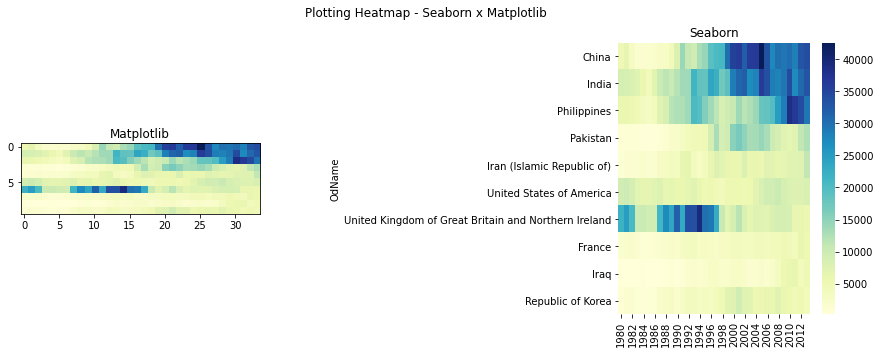

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Plotting Heatmap - Seaborn x Matplotlib')
fig.subplots_adjust(wspace=1.5, hspace=0.6)

axes[0].imshow(df_heat[:10], cmap='YlGnBu')
axes[0].set_title('Matplotlib')

sns.heatmap(df_heat[:10], cmap="YlGnBu")
axes[1].set_title('Seaborn')
plt.show()

### 2.1.1 Seaborn heatmap
This plot will be compare with the heatmap Matplotlib plot below.

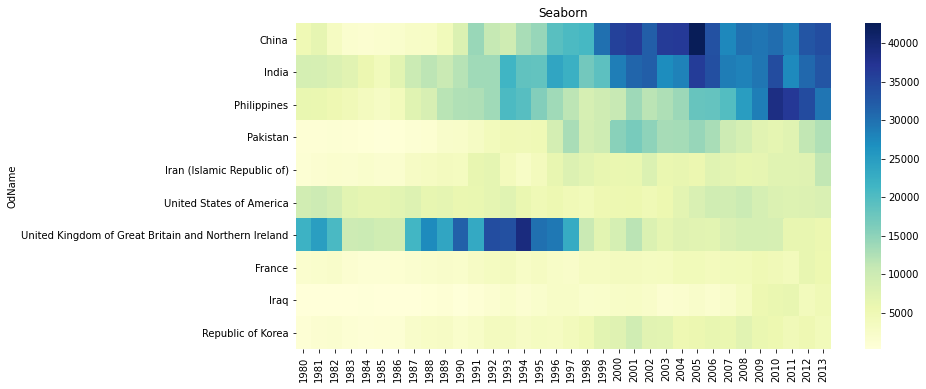

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_heat[:10], cmap="YlGnBu")
ax.set_title('Seaborn')
plt.show()

### 2.1.2. Matplotlib 'heatmap'

The code below demonstrates the extra effort to plot a graph with Matplotlib similar to the Seaborn heatmap.

Having full control over the features with Matplotlib is an advantage in some cases. However, Seaborn heatmap is an off-the-shelf tool when the user needs a tailored solution for the demand at hand.

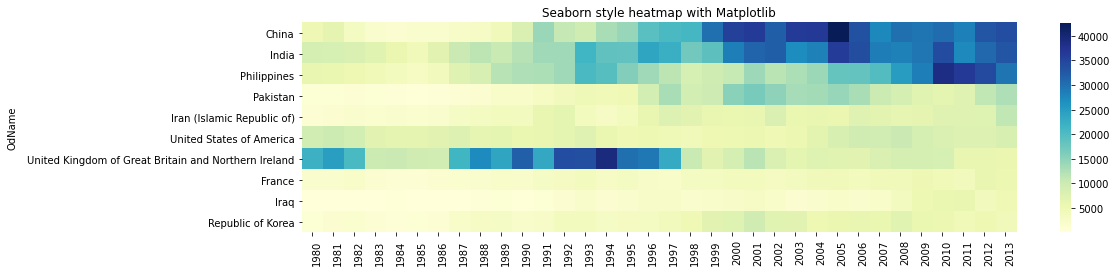

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))
im = ax.imshow(df_heat[:10], cmap='YlGnBu')
ax.set_title('Seaborn style heatmap with Matplotlib')

years = df_heat.columns.tolist()
countries = df_heat.index[:10].tolist()

# setting x and y ticks
ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(countries)))

# setting x and y tick labels
ax.set_xticklabels(years)
ax.set_yticklabels(countries)

# rotating x ticks in 90º degrees
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# removing spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# setting y label
ax.set_ylabel('OdName', labelpad=10, fontsize=10)

cb = fig.colorbar(im, ax=ax, shrink=0.32) # shrink parameter adjusts the colorbar size
cb.outline.set_visible(False) # removes colorbar borders

plt.show()

#  **3. Applying figure aesthetics control (figure style, removing axes spines)**



The dataset used in this section is the 'df_heat_T'.

In [11]:
df_heat_T.head()

OdName,years,China,India,Philippines,Pakistan,Iran (Islamic Republic of),United States of America,United Kingdom of Great Britain and Northern Ireland,France,Iraq,Republic of Korea,Algeria,Nigeria,Egypt,Haiti,Mexico,Bangladesh,Colombia,Morocco,Ukraine,Jamaica,Russian Federation,Cameroon,Sri Lanka,Lebanon,Viet Nam,Democratic Republic of the Congo,Somalia,Afghanistan,Israel,Eritrea,Brazil,Tunisia,Ethiopia,Romania,Cuba,Nepal,Jordan,South Africa,Republic of Moldova,...,Comoros,Slovenia,Saint Kitts and Nevis,Democratic People's Republic of Korea,Cyprus,Lao People's Democratic Republic,Turkmenistan,Mozambique,Oman,Equatorial Guinea,Malawi,Montenegro,Luxembourg,Lesotho,Brunei Darussalam,Qatar,Seychelles,Tonga,Suriname,Malta,Papua New Guinea,New Caledonia,Canada,Cabo Verde,Andorra,Nauru,Monaco,Sao Tome and Principe,Maldives,Kiribati,Liechtenstein,Western Sahara,American Samoa,Samoa,Vanuatu,San Marino,Palau,Guinea-Bissau,Tuvalu,Marshall Islands
0,1980,5123,8880,6051,978,1172,9378,22045,1729,262,1011,80,81,612,1666,409,83,266,325,0,3198,0,9,185,1409,1191,15,7,16,1403,0,211,58,98,375,306,1,177,1026,0,...,0,0,5,1,132,11,0,0,0,0,5,0,14,1,79,0,5,2,15,191,0,0,0,1,0,1,0,0,0,0,1,0,0,3,0,1,0,0,0,0
1,1981,6682,8670,5921,972,1429,10030,24796,2027,245,1456,67,60,660,3692,394,84,326,471,0,2634,0,2,371,1119,1829,16,10,39,1711,0,220,51,59,438,41,1,160,1118,0,...,2,0,3,1,128,6,0,0,0,0,4,0,4,1,6,0,15,4,10,242,2,0,0,1,0,0,0,0,0,0,4,0,1,7,0,0,0,0,1,0
2,1982,3308,8147,5249,1201,1822,9074,20620,2219,260,1572,71,58,755,3498,491,86,360,447,0,2661,0,16,290,1159,2162,17,7,39,1334,0,192,55,54,583,94,6,155,781,0,...,2,0,0,3,84,16,0,7,0,0,6,0,2,1,8,0,3,7,21,153,2,0,0,2,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0
3,1983,1863,7338,4562,900,1592,7100,10015,1490,380,1081,69,58,455,2860,490,81,244,335,0,2455,0,7,197,789,3404,17,12,47,541,0,139,46,98,543,104,1,113,379,0,...,0,0,16,1,46,16,0,2,8,0,3,0,5,2,2,0,4,1,12,64,4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,1984,1527,5704,3801,668,1977,6661,10170,1169,428,847,63,78,447,1418,509,98,235,248,0,2508,0,8,1086,1253,7583,28,14,71,446,0,145,51,154,524,101,2,102,271,0,...,0,0,21,4,46,7,0,3,0,0,2,0,1,7,2,0,1,2,5,60,2,0,0,11,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,0


## 3.1. Setting background styles with Seaborn "set_style"

Showing different background styles (white, dark, whitegrid, darkgrid, and ticks), according to [2].

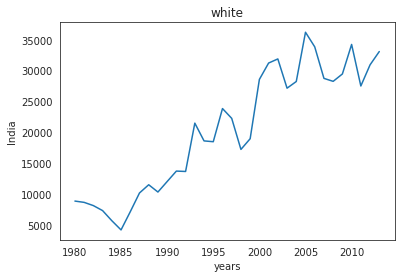

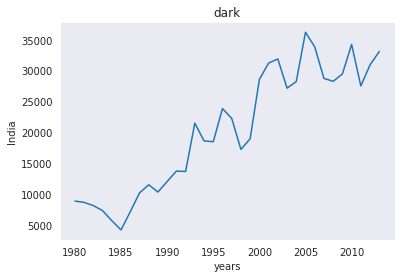

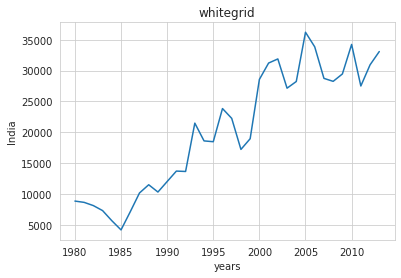

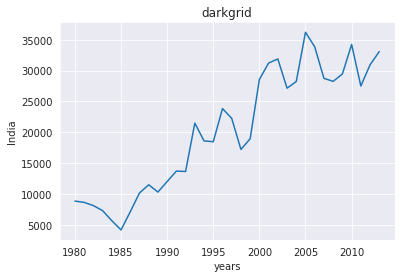

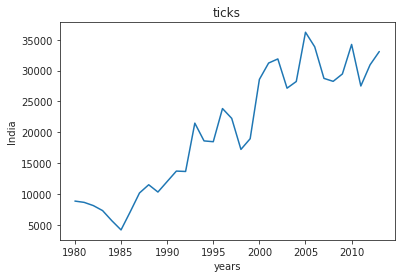

In [12]:
# Creates a list of styles and loops over it plotting each style
# with sns.set_style
style_list = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']
for style in style_list:
  sns.set_style(style)
  sns.lineplot(x='years', y='India', data=df_heat_T).set(title=style)
  plt.show()

## 3.2. Setting background styles with Seaborn "axes_style"

Seaborn website tutorial [3] provides an example to load different styles with 'axes_style'.

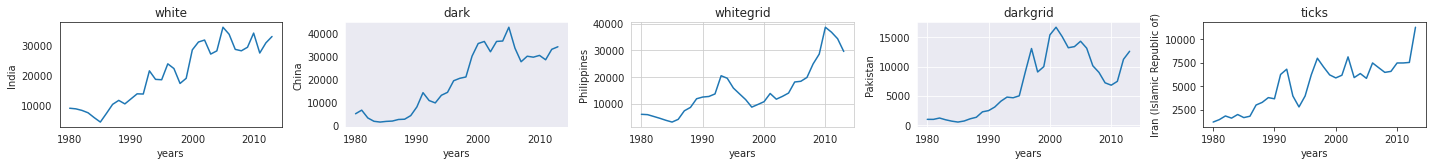

In [13]:
# Plots five different styles for the number of immigrants of
# India, China, Philippines, Pakistan, and Iran
style_list = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']
f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(2, 5)

with sns.axes_style(style_list[0]):
    ax = f.add_subplot(gs[0, 0]).set(title=style_list[0])
    sns.lineplot(x='years', y='India', data=df_heat_T)

with sns.axes_style(style_list[1]):
    ax = f.add_subplot(gs[0, 1]).set(title=style_list[1])
    sns.lineplot(x='years', y='China', data=df_heat_T)

with sns.axes_style(style_list[2]):
    ax = f.add_subplot(gs[0, 2]).set(title=style_list[2])
    sns.lineplot(x='years', y='Philippines', data=df_heat_T)

with sns.axes_style(style_list[3]):
    ax = f.add_subplot(gs[0, 3]).set(title=style_list[3])
    sns.lineplot(x='years', y='Pakistan', data=df_heat_T)

with sns.axes_style(style_list[4]):
    ax = f.add_subplot(gs[0, 4]).set(title=style_list[4])
    sns.lineplot(x='years', y='Iran (Islamic Republic of)', data=df_heat_T)

f.tight_layout()

## 3.3. Setting background styles with Matplotlib "style.use"

This section demonstrates how to set different styles with 'style.use' from Matplotlib. 

There is a list of 26 styles that can be chosen from. This higher number of options Matplotlib has shown an advantage over Seaborn as the latter has only a few types.

The drawback of using Matplotlib is that formatting the graph will require more lines of code. Note that the plots below do not have x and y labels and the x ticks (representing years) are in scientific notation.

In [14]:
# Printing the list of Matplotlib styles
print('Number of styles: ', len(plt.style.available))
print('First ten styles in the list: \n', plt.style.available[:10])

Number of styles:  26
First ten styles in the list: 
 ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn']


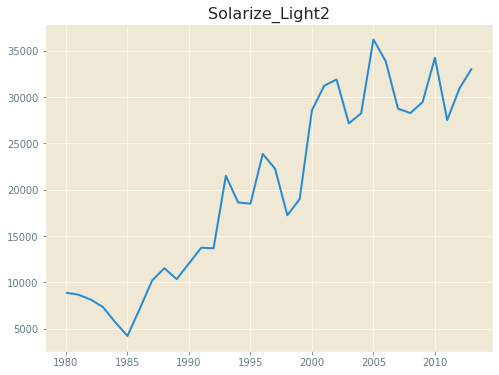

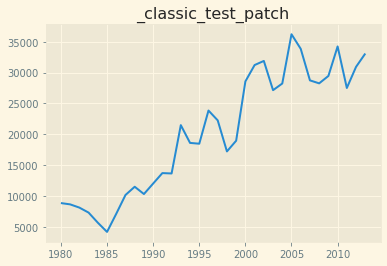

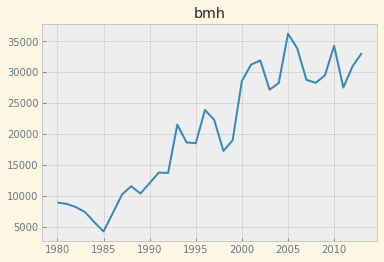

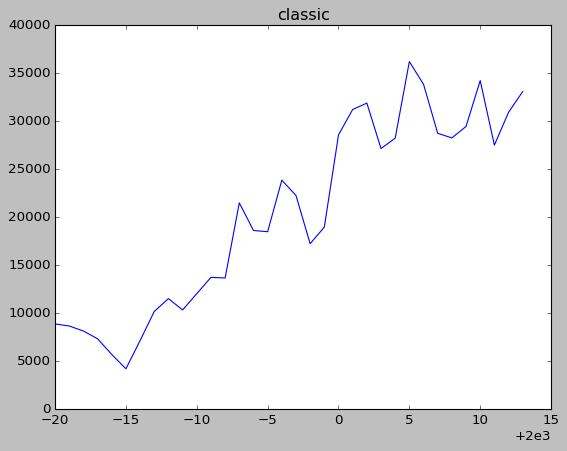

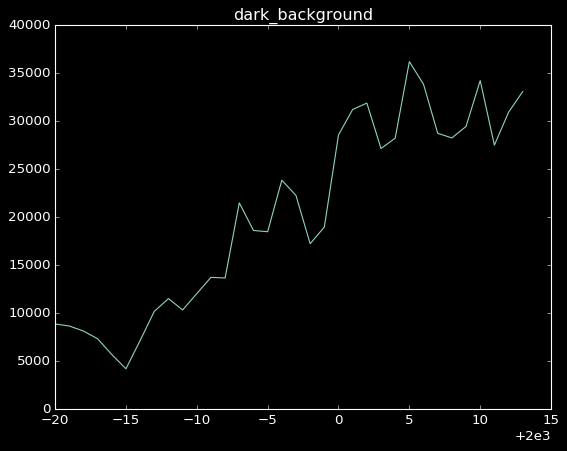

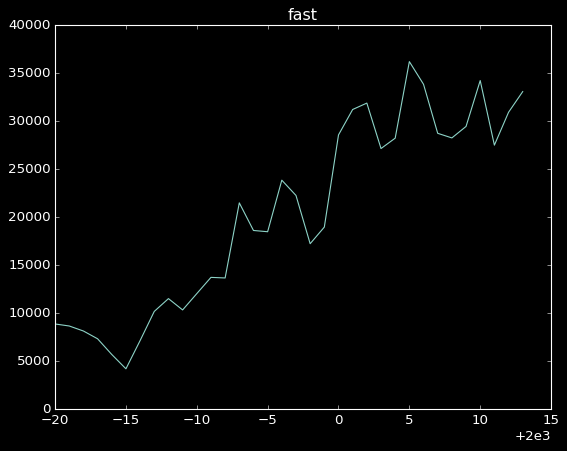

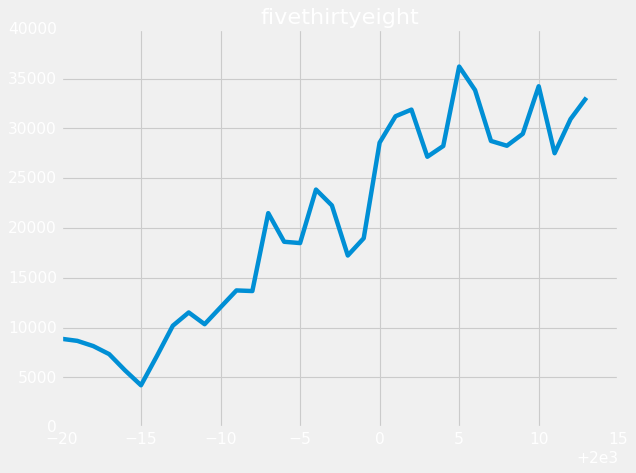

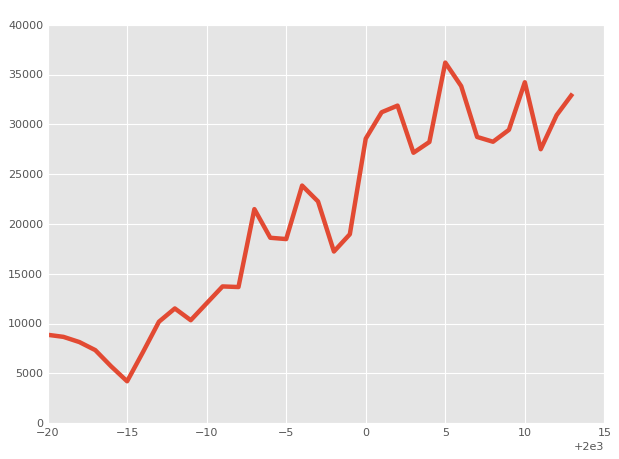

In [15]:
# Plots the eight different matplotlib styles.
# The data is the number of immigrants of India
f = plt.figure(figsize=(8, 6))

# data
x = df_heat_T['years']
y = df_heat_T['India']

for style in plt.style.available[:8]:
    plt.style.use(style)
    plt.plot(x, y)
    plt.title(style)
    plt.show()

## 3.4. Removing *spines*

This section compares side by side how to perform *spines* removing using Matplotlib and Seaborn.

Seaborn's advantage over Matplotlib is that spines are removed with a single line of code, and the x and y labels are plotted without coding.

One possible disadvantage is when the user does not want to remove all spines. In this case, Matplotlibe would offer more feature control.


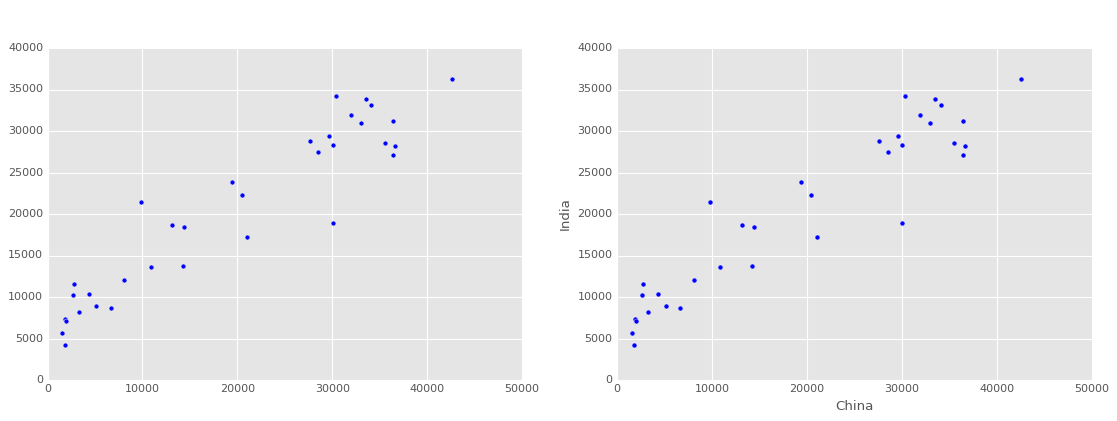

In [16]:
# Data
x = df_heat.loc['China']
y = df_heat.loc['India']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Removing spines - Matplotlib x Seaborn', fontsize=15, y=1.0)

# Matplotlib
axes[0].scatter(x=x, y=y)
axes[0].set_title('Matplotlib')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_xlim([0, 50000])

# Seaborn
sns.scatterplot(ax=axes[1], x=x, y=y)
sns.despine()
axes[1].set_title('Seaborn')
axes[1].set_xlim([0, 50000])

plt.show()

 # **4. Color pallets (categorical, sequential an diverging color platters)**

## 4.1. Color pallets

This section show different types of palletes Seaborn offers. More information can be found in [4]. A list of all the palette values to choose from can be found in [5]

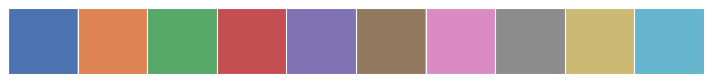

In [17]:
# Qualitative color pallets - pallete 'deep'
pallete_1 = sns.color_palette('deep')
sns.palplot(pallete_1)

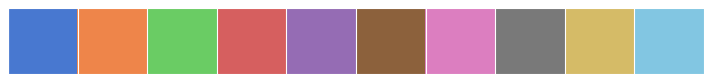

In [18]:
# Qualitative color pallets - pallete 'muted'
pallete_2 = sns.color_palette('muted')
sns.palplot(pallete_2)

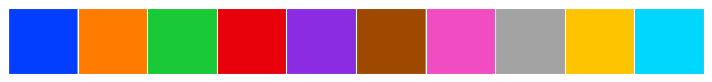

In [19]:
# Qualitative color pallets - pallete 'bright'
pallete_3 = sns.color_palette('bright')
sns.palplot(pallete_3)

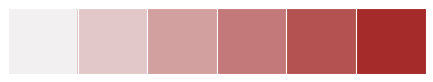

In [20]:
# Sequential color pallets - pallete 'brown'
custom_pallete = sns.light_palette('brown')
sns.palplot(custom_pallete)

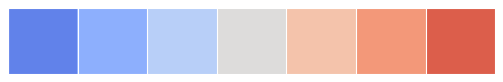

In [21]:
# Diverging color pallets - pallete 'coolwarm'
diverge_pallete = sns.color_palette('coolwarm', 7)
sns.palplot(diverge_pallete)

## 4.2. Implementing pallets

### 4.2.1. Seaborn pallets approach

A scatter plot will be drawn to demonstrate how pallets can be used with Seaborn.

The dataset used is 'df_pallete_seaborn'.

In [22]:
# Dataset used
plt.style.use('seaborn')
df_pallete_seaborn

AreaName,year,immigrants,reg,size,developed
0,1980,3951,Africa,1,no
1,1981,4363,Africa,1,no
2,1982,3819,Africa,1,no
3,1983,2671,Africa,1,no
4,1984,2639,Africa,1,no
...,...,...,...,...,...
29,2009,1860,Oceania,1,yes
30,2010,1834,Oceania,1,yes
31,2011,1548,Oceania,1,yes
32,2012,1679,Oceania,1,yes


The first plot shows the use of the 'deep' pallete.

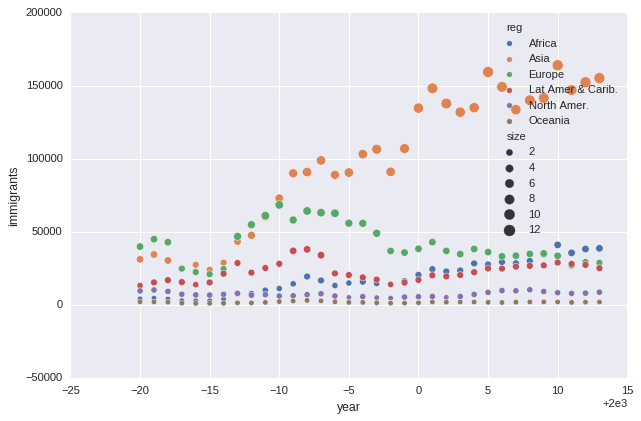

In [23]:
# Dataset used
sns.scatterplot(
    data=df_pallete_seaborn, x="year", y="immigrants", hue="reg", 
    size="size", palette="deep"
)
plt.show()

Some issues need to be addressed in the graph above:

- Legend plot and the chart are overlapping.
- x and y limits need adjusts
- x-axis is in scientific notation

The extra parameters added below fix them.

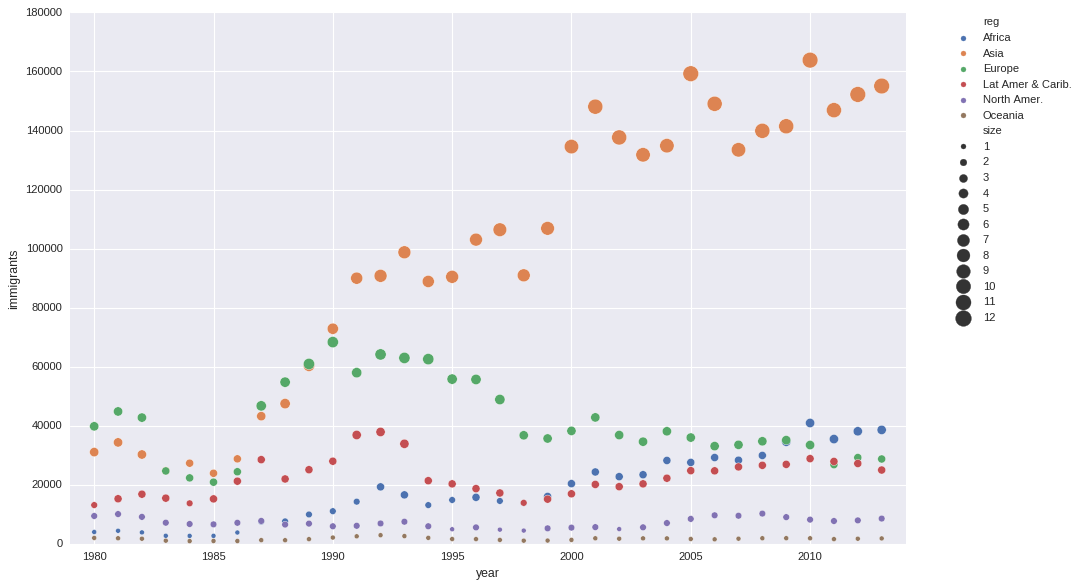

In [24]:
fig = plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df_pallete_seaborn, x="year", y="immigrants", hue="reg", size="size",
    sizes=(20, 200), hue_norm=(0, 2),  legend="full", palette="deep"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ticklabel_format(useOffset=False)
plt.xlim([1979, 2014])
plt.ylim([0, 180000])
plt.show()

The first plot shows the use of the 'Set2' pallete.

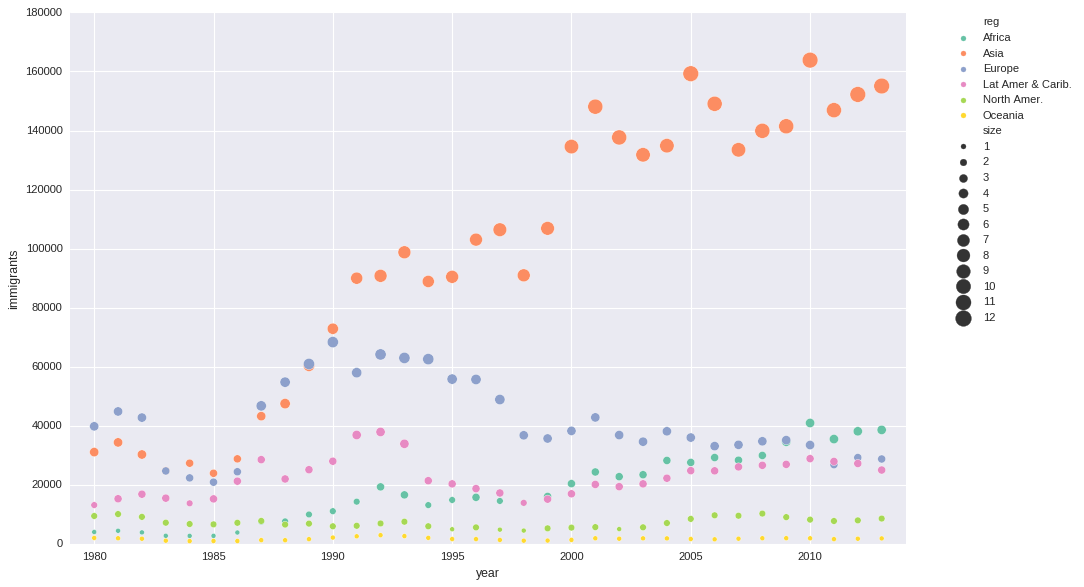

In [25]:
# 'Set2' pallete
fig = plt.figure(figsize=(12,8))

sns.scatterplot(
    data=df_pallete_seaborn, x="year", y="immigrants", hue="reg", size="size",
    sizes=(20, 200), hue_norm=(0, 2), legend="full", palette="Set2"
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ticklabel_format(useOffset=False)
plt.xlim([1979, 2014])
plt.ylim([0, 180000])
plt.show()

### 4.2.2. Matplotlib pallets **approach**

The code below demonstrates how extensive manipulation is required to produce a similar result with Matplotlib. 

Furthermore, the dataset is in a different format.

In [26]:
# Dataset used
df_pallete_matplot

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AreaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


Plotting a similar graph to the first Seaborn scatterplot done in section.

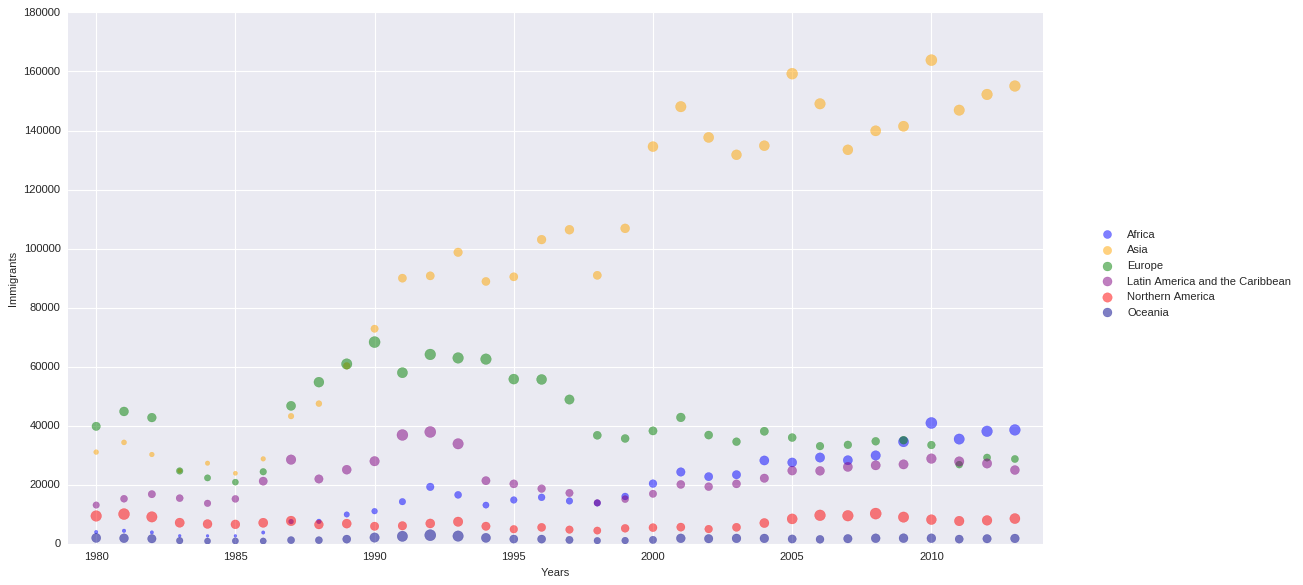

In [27]:
# Create lists with regions, colors and years 
regions = df_pallete_matplot.index.to_list()
colors = ['blue', 'orange', 'green', 'purple', 'red', 'darkblue']
years = list(range(1980, 2014))

plt.figure(figsize=(14, 8))

# running the data above at once
for i in range(len(regions)):
  region = df_pallete_matplot.loc[regions[i]]
  color = colors[i]
  region_normal = region/region.max()
  s = region_normal * 100
  plt.scatter(years, region, color=color, alpha=0.5, s = s, label=regions[i])

plt.ticklabel_format(useOffset=False)
plt.xlabel("Years", size=10)
plt.ylabel("Immigrants", size=10)
plt.xlim([1979, 2014])
plt.ylim([0, 180000])
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)
plt.show()

# **5. Demonstrate multi-plot in Seaborn**

### 5.1. FacetGrid

#### 5.1.1. Seaborn FacetGrid approach

Seaborn FacetGrid [6] is an exciting method to compare different features and different variables across the dataset.

The dataset used to demonstrate the power of FacetGrid is called 'df_facetgrid_seaborn', a copy of 'df_pallete_seaborn' dataset.

In [28]:
df_facetgrid_seaborn = df_pallete_seaborn.copy()
df_facetgrid_seaborn

AreaName,year,immigrants,reg,size,developed
0,1980,3951,Africa,1,no
1,1981,4363,Africa,1,no
2,1982,3819,Africa,1,no
3,1983,2671,Africa,1,no
4,1984,2639,Africa,1,no
...,...,...,...,...,...
29,2009,1860,Oceania,1,yes
30,2010,1834,Oceania,1,yes
31,2011,1548,Oceania,1,yes
32,2012,1679,Oceania,1,yes


The plot below shows the number of immigrants for developed and non-developed regions. Columns are the regions, and the rows are the non-developed (row 0) regions and the developed ones (row 1).

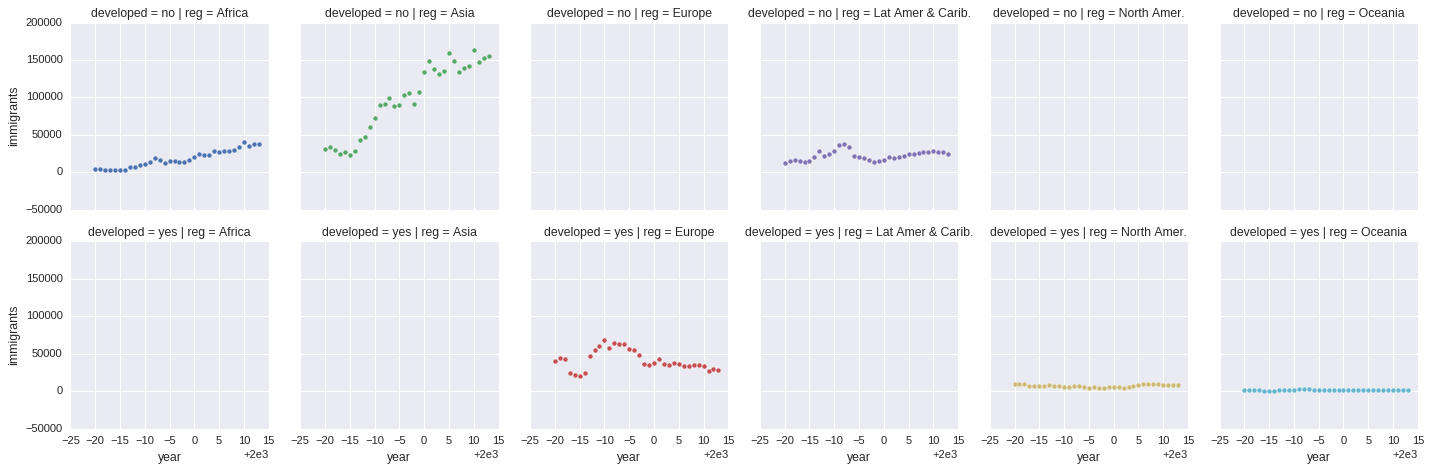

In [29]:
g = sns.FacetGrid(df_facetgrid_seaborn, col='reg', row="developed", hue='reg')
g.map_dataframe(sns.scatterplot, 'year', 'immigrants')
plt.show()

Again, to provide meaningful information using data visualization, the graphs need to display useful features. The chart above demonstrates some issues like:

- x and y limits need adjustments.
- x-axis is in scientific notation.
- need a legend.
- rotation in x ticks is needed

The code below changes the plot into a far better visualization.

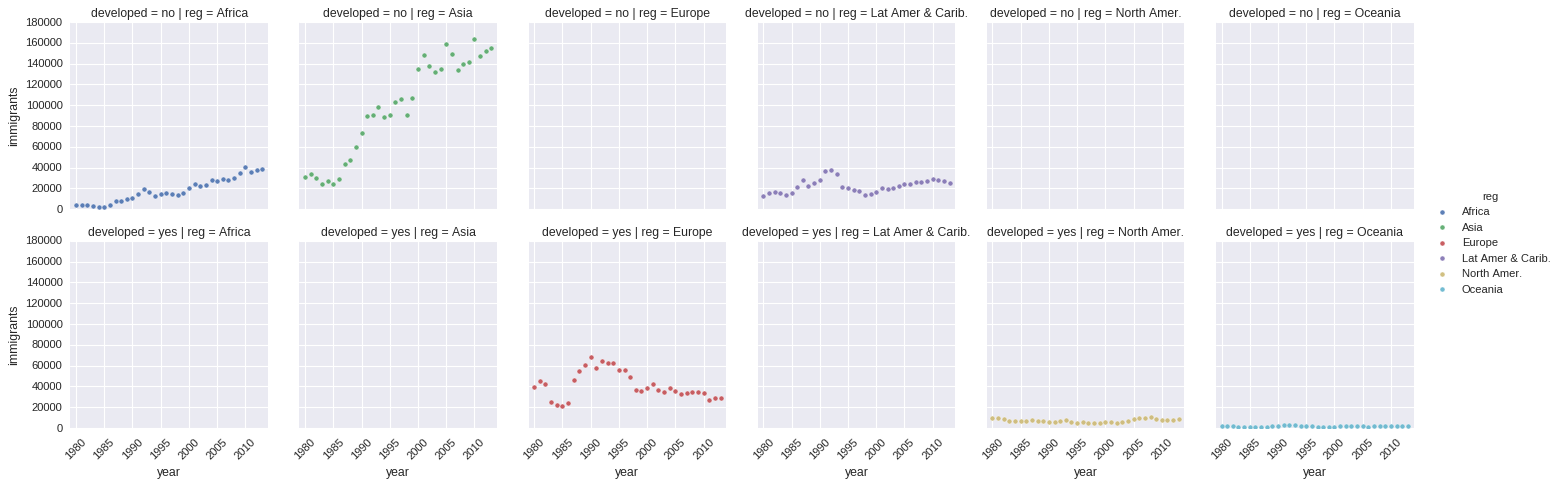

In [30]:
g = sns.FacetGrid(df_facetgrid_seaborn, col='reg', row="developed", hue='reg', height=3)
g.map_dataframe(sns.scatterplot, 'year', 'immigrants', alpha=0.9)
g.add_legend()
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
plt.ticklabel_format(useOffset=False)
plt.xlim([1979, 2014])
plt.ylim([0, 180000])
plt.show()

#### 5.1.2. Matplotlib 'FacetGrid' approach

As Matplotlib does not have FacetGrid, the code below demonstrates how the extensive manipulation can produce a similar result Seaborn FacetGrid gives.

Furthermore, the dataset is, again, in a different format.

In [31]:
df_facetgrid_matplotlib = df_pallete_matplot.copy()
df_facetgrid_matplotlib

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AreaName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


Trying to plot something similar to FacetGrid with Matplotlib is interesting as the user can customize the plot according to their need, thus providing a more tailored solution. However, that can be time-consuming, and a trade-off of using FacetGrid needs to be evaluated before start doing the task.

The list of colors used here can be found in [7].

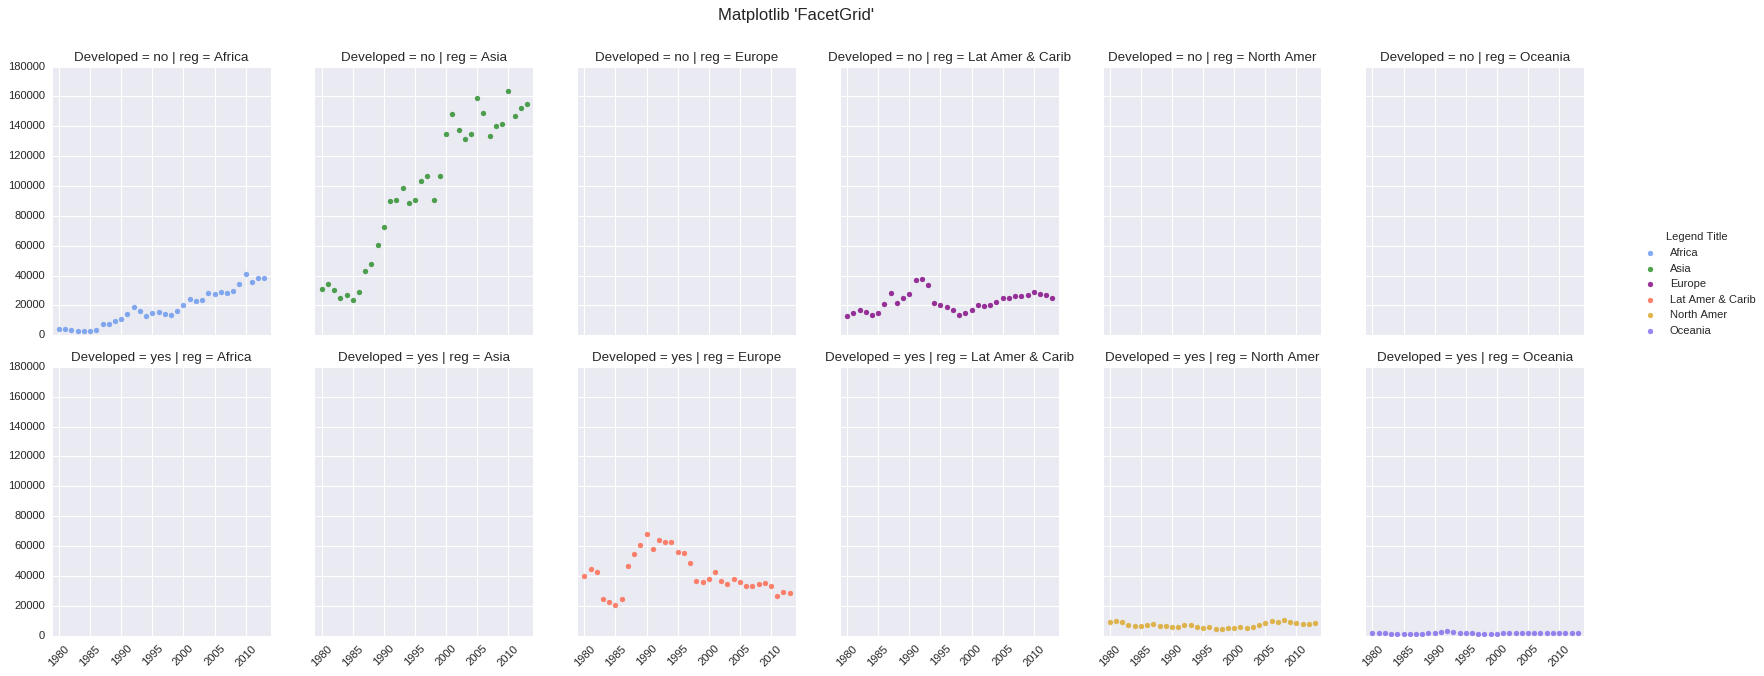

In [32]:
# creates lists to feed the loop
regions_original = df_facetgrid_matplotlib.index.to_list()
regions_title = ['Africa', 'Asia', 'Europe', 'Lat Amer & Carib',
          'North Amer', 'Oceania']
map = ['no', 'no', 'yes', 'no', 'yes', 'yes']
colors = ['cornflowerblue', 'forestgreen', 'tomato', 'purple', 'goldenrod', 'mediumslateblue']

# Creates sublplots
fig, axes = plt.subplots(2, 6, figsize=(20, 8), sharex=True, sharey=True)
fig.suptitle("Matplotlib 'FacetGrid'", fontsize = 15, y=1.05)

fig.subplots_adjust(wspace=0.2, hspace=0.2)

# loops over the subplots
legend_list = []
for i in range(axes.shape[0]):
  for j in range(axes.shape[1]):
    if (map[j] == 'no') and (i==0):
      region_name = regions_original[j]
      region_title =  regions_title[j]
      title = 'Developed = {} | reg = {}'.format(map[j], region_title)
      region_values = df_facetgrid_matplotlib.loc[region_name]
      color = colors[j]
      l = axes[i, j].scatter(x=years, y=region_values, color=color, alpha=0.8)
      legend_list.append(l)
      axes[i, j].set_title(title)
      axes[i, j].tick_params('x', labelrotation=45)
      axes[i, j].ticklabel_format(useOffset=False)
    elif (map[j] == 'yes') and (i==0):
      region_name = regions_original[j]
      region_title =  regions_title[j]
      title = 'Developed = no | reg = {}'.format(region_title)
      region_values = df_facetgrid_matplotlib.loc[region_name]
      axes[i, j].set_title(title)
      axes[i, j].tick_params('x', labelrotation=45)
      axes[i, j].ticklabel_format(useOffset=False)
    elif (map[j] == 'yes') and (i==1):
      region_name = regions_original[j]
      region_title =  regions_title[j]
      title = 'Developed = {} | reg = {}'.format(map[j], region_title)
      region_values = df_facetgrid_matplotlib.loc[region_name]
      color = colors[j]
      l = axes[i, j].scatter(x=years, y=region_values, color=color, alpha=0.8)
      legend_list.append(l)
      axes[i, j].set_title(title)
      axes[i, j].tick_params('x', labelrotation=45)
      axes[i, j].ticklabel_format(useOffset=False)
    elif (map[j] == 'no') and (i==1):
      region_name = regions_original[j]
      region_title =  regions_title[j]
      title = 'Developed = yes | reg = {}'.format(region_title)
      region_values = df_facetgrid_matplotlib.loc[region_name]
      axes[i, j].set_title(title)
      axes[i, j].tick_params('x', labelrotation=45)
      axes[i, j].ticklabel_format(useOffset=False)
      axes[i, j].set_xlim([1979, 2014])
      axes[i, j].set_ylim([0, 180000])

# create legend
fig.legend(legend_list, labels=regions_title, bbox_to_anchor=(1.1, 0.7), 
           borderaxespad=0.0, title="Legend Title")


plt.tight_layout()

plt.show()

# **6. Demonstrate regression plots in Seaborn**

## 6.1. Seaborn Regplot

Seaborn regplot plots data and a linear regression model fit [8].

A plot of the India immigrants will be ploted and we will try different orders (1, 2, 3, etc) and see what order gives a better result

In [33]:
# Dataset df_heat
df_heat_T.head()

OdName,years,China,India,Philippines,Pakistan,Iran (Islamic Republic of),United States of America,United Kingdom of Great Britain and Northern Ireland,France,Iraq,Republic of Korea,Algeria,Nigeria,Egypt,Haiti,Mexico,Bangladesh,Colombia,Morocco,Ukraine,Jamaica,Russian Federation,Cameroon,Sri Lanka,Lebanon,Viet Nam,Democratic Republic of the Congo,Somalia,Afghanistan,Israel,Eritrea,Brazil,Tunisia,Ethiopia,Romania,Cuba,Nepal,Jordan,South Africa,Republic of Moldova,...,Comoros,Slovenia,Saint Kitts and Nevis,Democratic People's Republic of Korea,Cyprus,Lao People's Democratic Republic,Turkmenistan,Mozambique,Oman,Equatorial Guinea,Malawi,Montenegro,Luxembourg,Lesotho,Brunei Darussalam,Qatar,Seychelles,Tonga,Suriname,Malta,Papua New Guinea,New Caledonia,Canada,Cabo Verde,Andorra,Nauru,Monaco,Sao Tome and Principe,Maldives,Kiribati,Liechtenstein,Western Sahara,American Samoa,Samoa,Vanuatu,San Marino,Palau,Guinea-Bissau,Tuvalu,Marshall Islands
0,1980,5123,8880,6051,978,1172,9378,22045,1729,262,1011,80,81,612,1666,409,83,266,325,0,3198,0,9,185,1409,1191,15,7,16,1403,0,211,58,98,375,306,1,177,1026,0,...,0,0,5,1,132,11,0,0,0,0,5,0,14,1,79,0,5,2,15,191,0,0,0,1,0,1,0,0,0,0,1,0,0,3,0,1,0,0,0,0
1,1981,6682,8670,5921,972,1429,10030,24796,2027,245,1456,67,60,660,3692,394,84,326,471,0,2634,0,2,371,1119,1829,16,10,39,1711,0,220,51,59,438,41,1,160,1118,0,...,2,0,3,1,128,6,0,0,0,0,4,0,4,1,6,0,15,4,10,242,2,0,0,1,0,0,0,0,0,0,4,0,1,7,0,0,0,0,1,0
2,1982,3308,8147,5249,1201,1822,9074,20620,2219,260,1572,71,58,755,3498,491,86,360,447,0,2661,0,16,290,1159,2162,17,7,39,1334,0,192,55,54,583,94,6,155,781,0,...,2,0,0,3,84,16,0,7,0,0,6,0,2,1,8,0,3,7,21,153,2,0,0,2,0,0,0,0,0,0,2,0,0,4,0,0,0,0,0,0
3,1983,1863,7338,4562,900,1592,7100,10015,1490,380,1081,69,58,455,2860,490,81,244,335,0,2455,0,7,197,789,3404,17,12,47,541,0,139,46,98,543,104,1,113,379,0,...,0,0,16,1,46,16,0,2,8,0,3,0,5,2,2,0,4,1,12,64,4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,1984,1527,5704,3801,668,1977,6661,10170,1169,428,847,63,78,447,1418,509,98,235,248,0,2508,0,8,1086,1253,7583,28,14,71,446,0,145,51,154,524,101,2,102,271,0,...,0,0,21,4,46,7,0,3,0,0,2,0,1,7,2,0,1,2,5,60,2,0,0,11,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,0


From the plots given by Seaborn regplot, the curve with order 7 seems to touch more datapoints, which means that it can be a good candidate for an Indian immigrants model. 

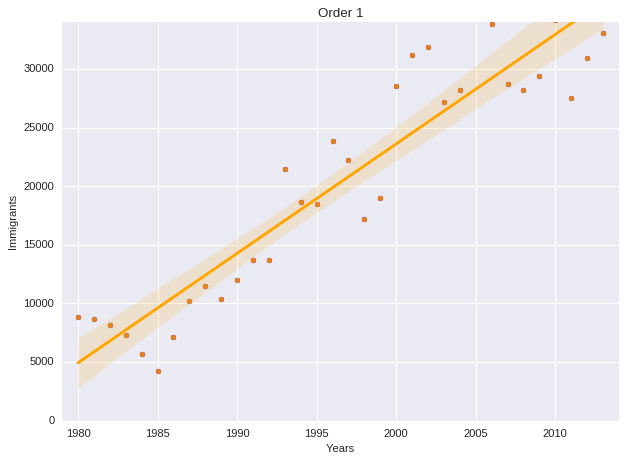

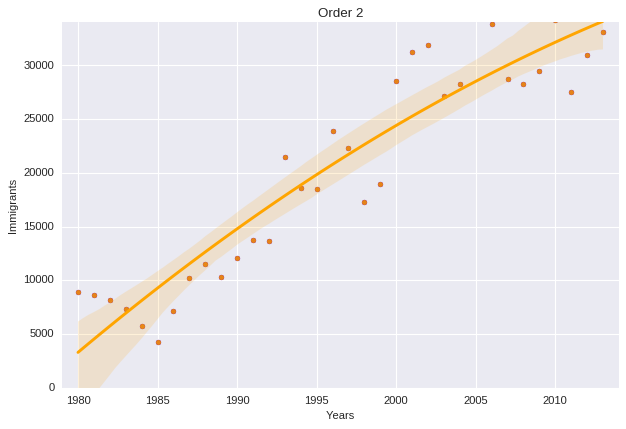

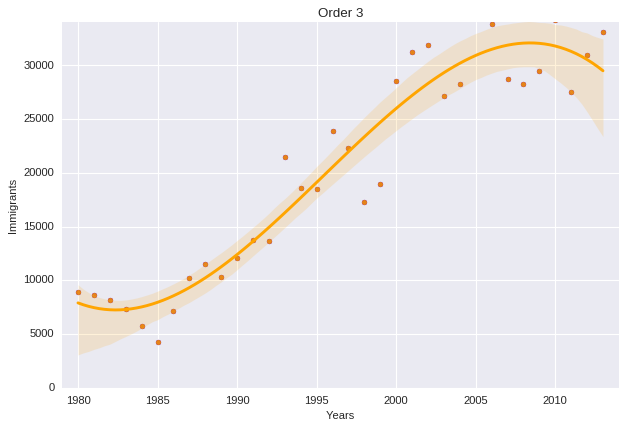

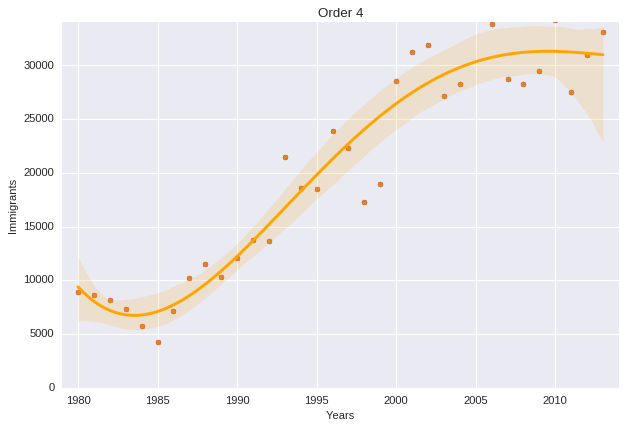

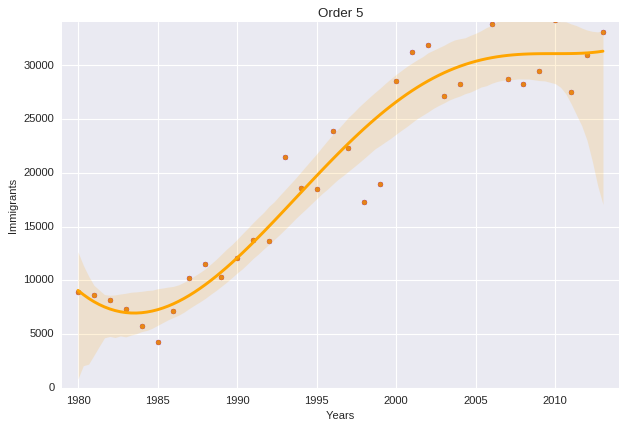

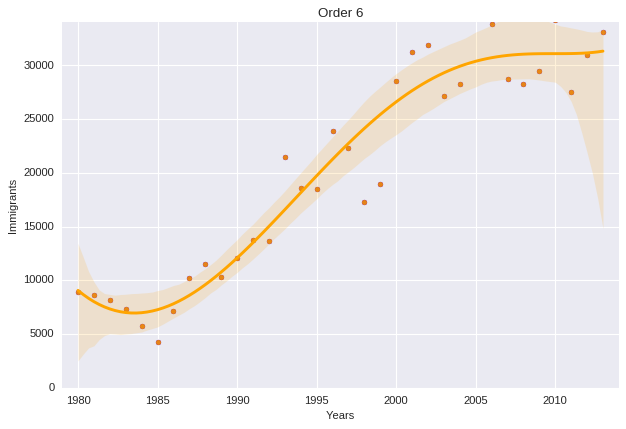

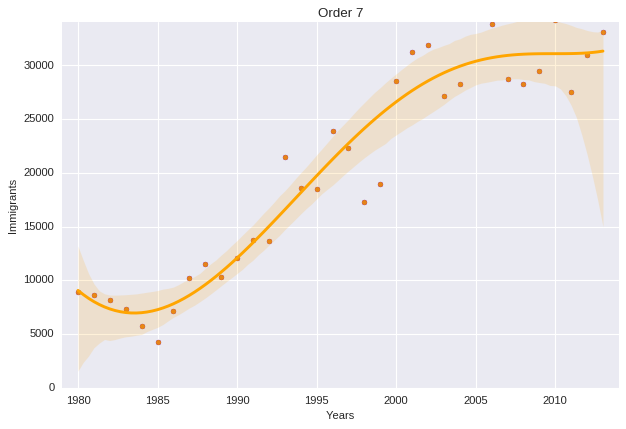

In [34]:
plt.figure(figsize=(8,6))

# plotting regression with orders from 1 to 7
for i in range(1, 8):
  label = 'Order {}'.format(i)
  plt.scatter(x='years', y='India', data=df_heat_T, color='purple', marker='o', alpha=1) # plots the points
  sns.regplot(x='years', y='India', data=df_heat_T, color='orange', label=label, order=i) # plots the regression
  plt.ticklabel_format(useOffset=False)
  plt.title(label)
  plt.xlabel("Years", size=10)
  plt.ylabel("Immigrants", size=10)
  plt.xlim([1979, 2014])
  plt.ylim([0, 34000])
  plt.show()

# **7. Conclusion**

This report demonstrates some powerful Seaborn methods  - Heatmap, scatterplots, plots, FacetGrid and Regplot- and features - set_styles, axes_styles, *spines* removing pallets. In parallel, it was possible to see how we achieved interesting similar results with Matplotlib.

Seaborn has demonstrated its capacity of drawing beautiful plots with small code lines, although we needed extra code to address some issues. On the other hand, Matplotlib's features control gives more power to the user, although it takes more time in the process.

We can conclude that there is no best tool but a better tool for the specific task at hand. The takeaway is that the data visualization professional needs to know each tool well to effectively and efficiently solve problems.

# **8. References**

[1] Rashida084. (2020, August 22). *Step by Step Guide to Interactive Choropleth Map. Regenaritive Today*. https://regenerativetoday.com/step-by-step-guide-to-interactive-choropleth-map/

[2] Moffitt, C. (n.d). *Using Seaborn Styles*. Aws Amazon. https://s3.amazonaws.com/assets.datacamp.com/production/course_6919/slides/chapter2.pdf

[3] Seaborn. (n.d.). *Controlling figure aesthetics*. Retrieved Mar 26, 2021, from https://seaborn.pydata.org/tutorial/aesthetics.html

[4] Seaborn. (n.d.). *seaborn.color_palette*. Retrieved Mar 26, 2021, from https://seaborn.pydata.org/generated/seaborn.color_palette.html

[5] Jones, M. (2020, April 19). *Color Guide to Seaborn Palettes*. Medium. https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f 

[6] Seaborn. (n.d.). *seaborn.FacetGrid*. Retrieved Mar 26, 2021, from https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

[7] Matplotlib. (n.d.). *List of named colors*. Retrieved Mar 26, 2021, from https://matplotlib.org/stable/gallery/color/named_colors.html

[8] Seaborn. (n.d.). *seaborn.regplot*. Retrieved Mar 26, 2021, from https://seaborn.pydata.org/generated/seaborn.regplot.html
